In [1]:
import TNGFunctions as TNG
import PlotFunctions as plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import MATH
import warnings
import os

from scipy.interpolate import interp1d
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import WMAP7
from matplotlib.lines import Line2D


plt.style.use('abhner.mplstyle')
np.seterr(divide='ignore') # ignore divide by zero


warnings.filterwarnings( "ignore")

In [2]:
# cosmological parameters
Omegam0 = 0.3089
h = 0.6774

#SIM TNG
SIMTNG = 'TNG50'

#Paths
dfTime = pd.read_csv(os.getenv("HOME")+'/TNG_Analyzes/SubhaloHistory/SNAPS_TIME.csv')
df_z0_Mstar_Range = pd.read_csv(os.getenv("HOME")+'/TNG_Analyzes/SubhaloHistory/TNG50/DFs/Sample.csv')

# FIG. 1

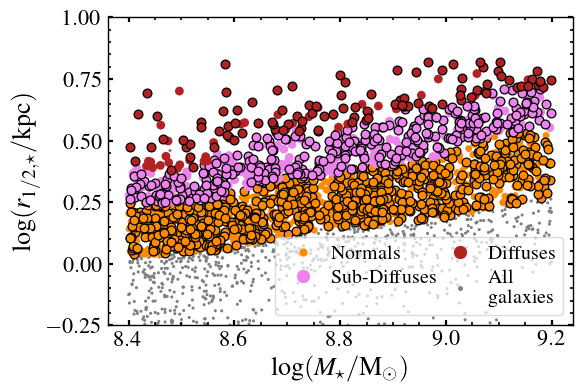

In [23]:
fig=plt.figure(facecolor='white')
plt.rcParams.update({'figure.figsize': (4, 4)})
X = np.transpose(np.array([df_z0_Mstar_Range.logMstarRad_99,df_z0_Mstar_Range.logHalfRadstar_99]))
Masses = np.linspace(8.4, 9.2, 100)


plt.scatter(X[:,0],X[:,1],s=5,c='gray',ec='none')

# Main branch

# Normals
plt.scatter(df_z0_Mstar_Range.logMstarRad_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('NormalSatellite', SubfindID_99 = True))],
            df_z0_Mstar_Range.logHalfRadstar_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('NormalSatellite', SubfindID_99 = True))],
            s=25,c='darkorange', ec= 'none')

plt.scatter(df_z0_Mstar_Range.logMstarRad_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('NormalCentral', SubfindID_99 = True))],
            df_z0_Mstar_Range.logHalfRadstar_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('NormalCentral', SubfindID_99 = True))],
            s=40,c='darkorange', linewidths= 0.9)


# Compact Main branch

plt.scatter(df_z0_Mstar_Range.logMstarRad_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('SubDiffuseSatellite', SubfindID_99 = True))],
            df_z0_Mstar_Range.logHalfRadstar_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('SubDiffuseSatellite', SubfindID_99 = True))],
            s=40,c='violet', ec= 'none')

plt.scatter(df_z0_Mstar_Range.logMstarRad_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('SubDiffuseCentral', SubfindID_99 = True))],
            df_z0_Mstar_Range.logHalfRadstar_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('SubDiffuseCentral', SubfindID_99 = True))],
            s=40,c='violet', linewidths= .9)



# Compact Secondary branch


plt.scatter(df_z0_Mstar_Range.logMstarRad_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('DiffuseSatellite', SubfindID_99 = True))],
            df_z0_Mstar_Range.logHalfRadstar_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('DiffuseSatellite', SubfindID_99 = True))],
            s=40,c='firebrick', ec= 'none')

plt.scatter(df_z0_Mstar_Range.logMstarRad_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('DiffuseCentral', SubfindID_99 = True))],
            df_z0_Mstar_Range.logHalfRadstar_99[df_z0_Mstar_Range.SubfindID_99.isin(TNG.extractPopulation('DiffuseCentral', SubfindID_99 = True))],
            s=40,c='firebrick', linewidths= .9)



columnspacing = 0.2
handletextpad = 0.4
labelspacing = 0.3
fontlegend= 24
framealpha= 0.7
alphaScater=0.8
quantile=0.28

custom_lines, label, ncol, mult = plot.Legend(
    ['NormalScatter',  'SubDiffuseScatter', 'DiffuseScatter','TNGrageScatter'])
plt.legend(
    custom_lines, label, loc = 'lower right',  ncol=ncol, fontsize=mult*fontlegend, framealpha=framealpha, 
    columnspacing = columnspacing, handletextpad = handletextpad, labelspacing = labelspacing)

plt.ylim(-0.25, 1.0)
#plt.xlim(0, 10)
plt.tick_params(labelsize = 0.85 * 19)
plt.xlabel(r'$\log(M_\star/\mathrm{M}_\odot)$', fontsize = 19)
plt.ylabel(r'$\log(r_{1/2, \star}/\mathrm{kpc})$', fontsize = 19)


plt.savefig(os.getenv("HOME")+'/TNG_Analyzes/Figs/' + SIMTNG + '/PaperIII/PlotScatter/masssize.pdf')
plt.savefig(os.getenv("HOME")+'/TNG_Analyzes/Figs/' + SIMTNG + '/PaperIII/PlotScatter/masssize.png')

# Fig. 2


 Type:  Central
Normal  X =  0.0103157983747527 Y =  0.0738401367106206
SubDiffuse  X =  0.0092517331737316 Y =  0.0911865945019541
Diffuse  X =  0.00809297195694235 Y =  0.1111813230992464

 Type:  Satellite
Normal  X =  0.0424901741080345 Y =  0.0117031577332215
SubDiffuse  X =  0.030034477564145748 Y =  0.01959679759458775
Diffuse  X =  0.020846843196510152 Y =  0.0365179112069828

 Type:  Central
Normal  X =  0.0103157983747527 Y =  0.9146721257286078
SubDiffuse  X =  0.0092517331737316 Y =  0.8993634754496243
Diffuse  X =  0.00809297195694235 Y =  0.8807944497532076

 Type:  Satellite
Normal  X =  0.0424901741080345 Y =  0.9108987096419472
SubDiffuse  X =  0.030034477564145748 Y =  0.9219262642479739
Diffuse  X =  0.020846843196510152 Y =  0.9273240080698498


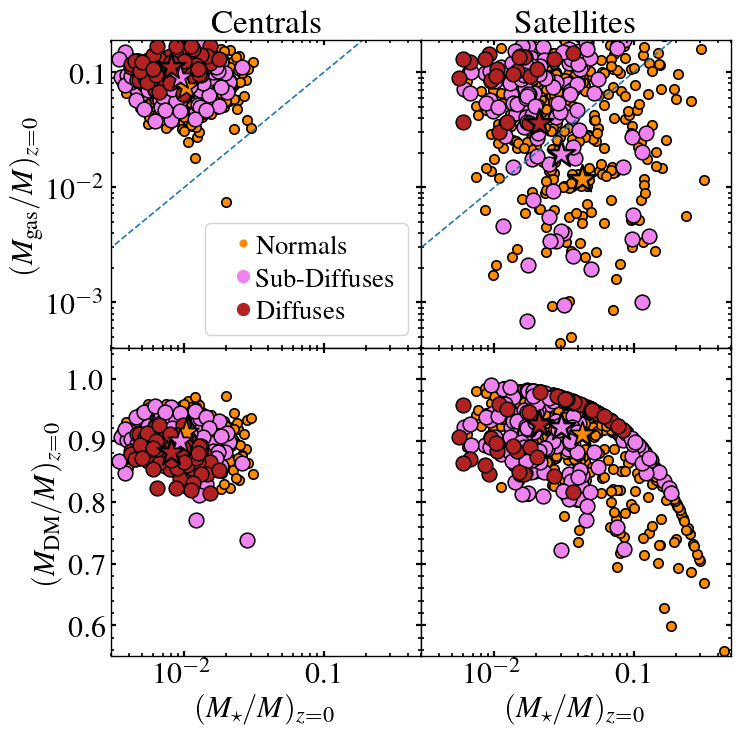

In [24]:
plot.PlotScatter(['Normal', 'SubDiffuse', 'Diffuse'], ['Central', 'Satellite'], 'StarFrac_99', ['GasFrac_99', 'DMFrac_99'],  Type='z0', snap=[99],
                medianBins=False, medianAll=False, xlabelintext=False, All=None,
                legend=True, LegendNames=[['NormalScatter', 'SubDiffuseScatter', 'DiffuseScatter']],  TRANSPARENT = False, COLORBAR = None, medianDot = True, 
                alphaScater=1.,   alphaShade=0.3,  linewidth=1.2,  fontlabel=22, 
                m='o', msizet=14, quantile=0.95,framealpha = 0.85, q = 0.95,
                ylimmin = [0.0004, 0.55], ylimmax = [0.19, 1.05], xlimmin = [0.003, 0.003], xlimmax = [0.1, 0.5], MarkerSizes = None,
                legpositions = [[0,0]],
                loc = ['best'],
                lNum = 4, cNum = 4, msizeMult = 1.5,
                columnspacing = 0.5, handletextpad = -0.5, labelspacing = 0.3,  title= ['Centrals', 'Satellites'],
                savepath='PaperIII/PlotScatter',  savefigname='GasStarFracs', dfName='Sample', SampleName='Samples', cmap = 'inferno',
                bins=10, seed=16010504, mult = 4.1)


# FIG. 3

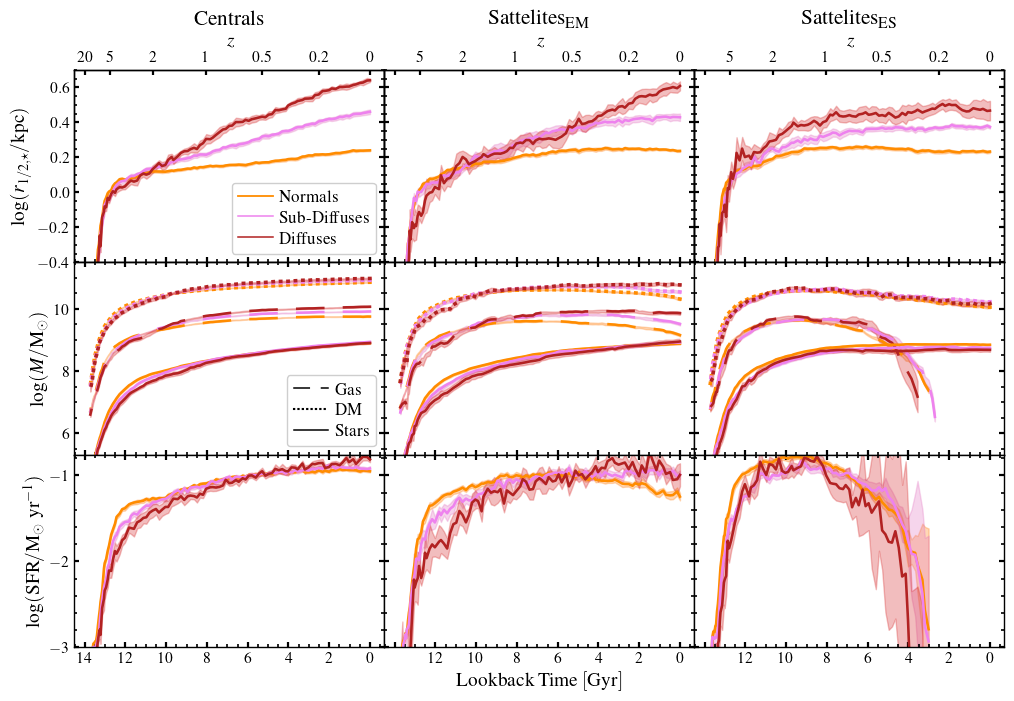

In [28]:
plot.PlotMedianEvolution(['Normal', 'SubDiffuse', 'Diffuse'],['Central', 'SatelliteNotInteract', 'SatelliteInteract'],  
                         [['SubhaloHalfmassRadType4'], 
                          ['SubhaloMassType0', 'SubhaloMassType1', 'SubhaloMassType4'], 
                          ['SubhaloSFR']], 
                    Type='Evolution', Xparam=['Time'], title=['Central', 'SatelliteNotInteract', 'SatelliteInteract'], 
                    savepath='PaperIII/PlotMedianEvolution',  savefigname='AllEvolution', dfName='PaperIII', SampleName='SubfindID_99', 
                    LegendNames=[['Normal', 'SubDiffuse', 'Diffuse'], ['Type0', 'Type1', 'Type4']], 
                    loc = ['best', 'best', 'best'],  loctext = ['best'],
                    ylimmin = [-0.4, 5.3, -3], ylimmax = [0.7, 11.5, -0.76], xlimmin = None, xlimmax = None,  
                    legpositions = [[0, 0], [0, 1], [0, 2]],  
                    xlabelintext=False, lineparams= True,  LookBackTime = True, 
                    ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                    Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                    lNum = 2.5, cNum = 4, JustOneXlabel = True,
                    alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,   fontlabel=14,     nboots=100,  multtick = 0.8,
                    Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                    bins=10, seed=16040105)

# FIG. 4

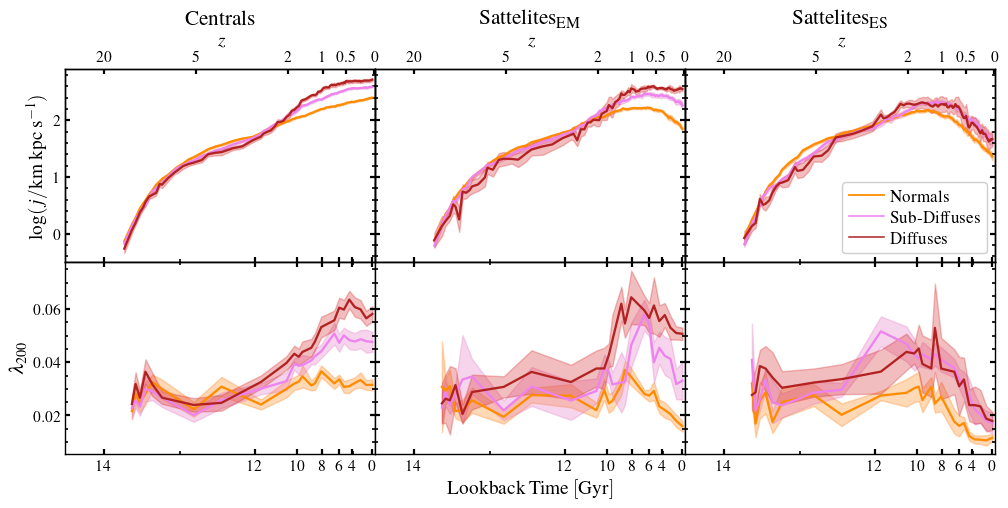

In [29]:
plot.PlotMedianEvolution(['Normal', 'SubDiffuse', 'Diffuse'],['Central', 'SatelliteNotInteract', 'SatelliteInteract'],  
                         ['SubhaloSpin', 'l200'], 
                    Type='Evolution', Xparam=['Time'], title=['Central', 'SatelliteNotInteract', 'SatelliteInteract'], 
                    savepath='PaperIII/PlotMedianEvolution',  savefigname='AngularEvoluton', dfName='PaperIII', SampleName='SubfindID_99', 
                    LegendNames=[['Normal', 'SubDiffuse', 'Diffuse']], 
                    loc = ['best'],  loctext = ['best'],
                    #ylimmin = [-0.4, 5.3, -10.1], ylimmax = [0.7, 11.5, -7.8], xlimmin = None, xlimmax = None,  
                    legpositions = [[2, 0]],  XScaleSymlog = True,
                    xlabelintext=False, lineparams= False,  LookBackTime = True, 
                    ColumnPlot=True, limaxis=True,  legend=True,  legendColumn = True, 
                    Transparent = True, Text = None, Pericenter = False, Supertitle = False,
                    lNum = 2.5, cNum = 4, JustOneXlabel = True,
                    alphaShade=0.3,  linewidth=1.1, framealpha = 0.95,   fontlabel=14,     nboots=100,  multtick = 0.8,
                    Supertitle_y = 0.99,  columnspacing = 0.5, handletextpad = 0.4, labelspacing = 0.3, 
                    bins=10, seed=16040105)

# FIG. 5


 Type:  Central
Name:  Central
X and Y
Spearman rank correlation coefficient: 0.040
P-value: 5.26e-01
X and ColorBAR
Spearman rank correlation coefficient: 0.537
P-value: 1.48e-20
Y and ColorBAR
Spearman rank correlation coefficient: 0.088
P-value: 1.58e-01

 Type:  SatelliteNotInteract
Name:  SatelliteNotInteract
X and Y
Spearman rank correlation coefficient: 0.302
P-value: 9.35e-03
X and ColorBAR
Spearman rank correlation coefficient: 0.423
P-value: 1.92e-04
Y and ColorBAR
Spearman rank correlation coefficient: 0.043
P-value: 7.21e-01

 Type:  SatelliteInteract
Name:  SatelliteInteract
X and Y
Spearman rank correlation coefficient: 0.043
P-value: 7.07e-01
X and ColorBAR
Spearman rank correlation coefficient: 0.244
P-value: 3.15e-02
Y and ColorBAR
Spearman rank correlation coefficient: 0.074
P-value: 5.21e-01

 Type:  Central
Name:  Central
X and Y
Spearman rank correlation coefficient: 0.230
P-value: 2.03e-04
X and ColorBAR
Spearman rank correlation coefficient: 0.561
P-value: 1.20e

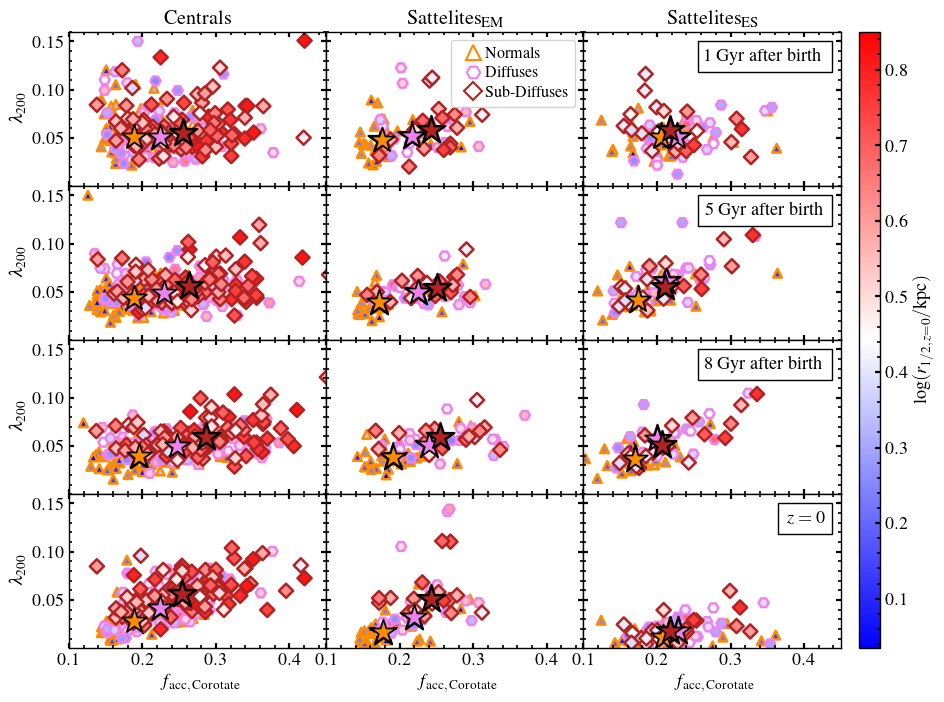

In [7]:
plot.PlotScatter(['Normal', 'SubDiffuse', 'Diffuse'],['Central', 'SatelliteNotInteract', 'SatelliteInteract'], ['CumulativeCorotateFraction_at_1', 'CumulativeCorotateFraction_at_5', 'CumulativeCorotateFraction_at_8', 'CumulativeCorotateFraction'], ['l200_NewMeanAfter1Gyr', 'l200_NewMeanAfter5Gyr', 'l200_NewMeanAfter8Gyr', 'l200_New_at_99'],  Type='z0', snap=[99],
 title=['Central', 'SatelliteNotInteract', 'SatelliteInteract'], medianBins=False, medianAll=False, xlabelintext=True, All=None,
                legend=True, LegendNames=[['NormalColorbarEmptyScatter', 'SubDiffuseColorbarEmptyScatter', 'DiffuseColorbarEmptyScatter']],  TRANSPARENT = False, COLORBAR = ['logHalfRadstar_99', 'logHalfRadstar_99', 'logHalfRadstar_99', 'logHalfRadstar_99'], medianDot = True, SpearManTestAll = True,
                alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
                fontlabel=13.2,  
                m='o', msizet=6.5, quantile=0.95,framealpha = 0.85, q = 0.95,
                MarkerSizes = None,
                lNum = 2, cNum = 4, GridMake = False,
                ylimmin = [0.0005, 0.0005, 0.0005,0.0005], ylimmax = [0.16, 0.16, 0.16, 0.16], xlimmin = [0.1, 0.1, 0.1, 0.1], xlimmax = [0.45, 0.45, 0.45, 0.45],  
                legpositions = [[1, 0]],  
                columnspacing = 0.5, handletextpad = -0.3, labelspacing = 0.3, loc = ['best'],
                savepath='PaperIII/PlotScatter',  savefigname='l200_frac', dfName='PaperIII', SampleName='Samples', cmap = 'bwr',
                bins=10, seed=16010504, mult = 4.1)

# Fig. 6

Normal: 5.802623263270975
SubDiffuse: 6.6270367044253815
Diffuse: 6.493534789316629
Normal: 5.616312839033608
SubDiffuse: 5.616312839033608
Diffuse: 5.521230066111288
Normal: 5.583806694106901
SubDiffuse: 5.530882643708981
Diffuse: 5.674092624547469


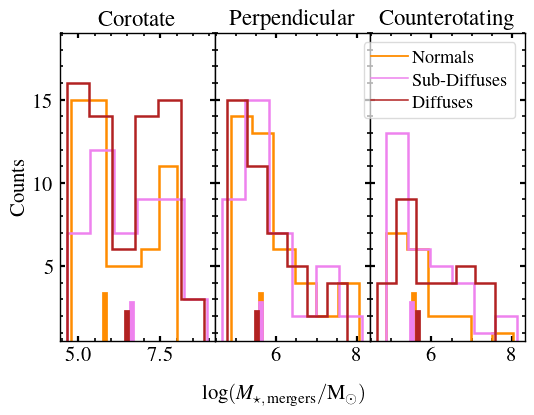

In [22]:
plot.PlotHist(['Normal', 'SubDiffuse', 'Diffuse'], ['logSUM_Mstar_merger_Corotate',
             'logSUM_Mstar_merger_Perpendicular', 'logSUM_Mstar_merger_Counterotating'], [''],
                 Type = 'z0',
               savepath='PaperIII/PlotHist',  savefigname='Mergers', dfName='PaperIII', SampleName='SubfindID_99', 
                density=False, JustOneXlabel = True,
                ColumnPlot = False, bins=6, median=True,  legend = True, 
                lNum = 4, cNum = 2,
                LegendNames = [[ 'Normal', 'SubDiffuse', 'Diffuse']], 
                loc = ['upper right'],
                legpositions= [[2,0]],
                title = ['Corotate',
                             'Perpendicular', 'Counterotating'],
               TRANSPARENT = True, LookBackTime = True,
                fontlabel=15, toplim = 19,
                framealpha=0.7, handletextpad = 0.25)

In [9]:
TNG.compare_Sample_key('logSUM_Mstar_merger_Corotate', [['Normal', 'SubDiffuse'],
                                             ['Normal', 'Diffuse'],
                                             ['SubDiffuse', 'Diffuse']], dfName = 'PaperIII')

Normal  and  SubDiffuse
Medians:  5.803 6.627
Observed Test Statistic: 0.82441
Permutation Test P-Value: 0.0293
Normal  and  Diffuse
Medians:  5.803 6.494
Observed Test Statistic: 0.69091
Permutation Test P-Value: 0.09908
SubDiffuse  and  Diffuse
Medians:  6.627 6.494
Observed Test Statistic: 0.1335
Permutation Test P-Value: 0.80114


# Fig. 7


 Type:  Central
Name:  Central
X and Y
Spearman rank correlation coefficient: -0.033
P-value: 5.97e-01
X and ColorBAR
Spearman rank correlation coefficient: -0.023
P-value: 7.20e-01
Y and ColorBAR
Spearman rank correlation coefficient: 0.608
P-value: 3.06e-27

 Type:  SatelliteNotInteract
Name:  SatelliteNotInteract
X and Y
Spearman rank correlation coefficient: -0.153
P-value: 2.00e-01
X and ColorBAR
Spearman rank correlation coefficient: -0.178
P-value: 1.36e-01
Y and ColorBAR
Spearman rank correlation coefficient: 0.635
P-value: 2.10e-09

 Type:  SatelliteInteract
Name:  SatelliteInteract
X and Y
Spearman rank correlation coefficient: 0.400
P-value: 4.15e-04
X and ColorBAR
Spearman rank correlation coefficient: 0.106
P-value: 3.71e-01
Y and ColorBAR
Spearman rank correlation coefficient: 0.224
P-value: 5.45e-02


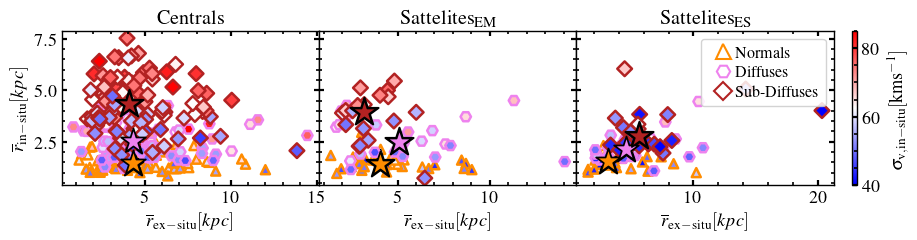

In [10]:
plot.PlotScatter(['Normal', 'SubDiffuse', 'Diffuse'],['Central', 'SatelliteNotInteract', 'SatelliteInteract'], 'RadEx', ['RadIn'],  Type='z0', snap=[99],
 title=['Central', 'SatelliteNotInteract', 'SatelliteInteract'], medianBins=False, medianAll=False, xlabelintext=False, All=None,
                legend=True, LegendNames=[['NormalColorbarEmptyScatter', 'SubDiffuseColorbarEmptyScatter', 'DiffuseColorbarEmptyScatter']],  TRANSPARENT = False, COLORBAR = ['SigmaIn'], medianDot = True, SpearManTestAll = True,
                alphaScater=1.,   alphaShade=0.3,  linewidth=1.2, 
                fontlabel=13.2,  
                m='o', msizet=6.5, quantile=0.95,framealpha = 0.85, q = 0.95,
                MarkerSizes = None,
                lNum = 2, cNum = 4, GridMake = False,
                #ylimmin = [0.0005, 0.0005, 0.0005,0.0005], ylimmax = [0.16, 0.16, 0.16, 0.16], xlimmin = [0.1, 0.1, 0.1, 0.1], xlimmax = [0.45, 0.45, 0.45, 0.45],  
                legpositions = [[2, 0]],  
                columnspacing = 0.5, handletextpad = -0.3, labelspacing = 0.3, loc = ['best'],
                savepath='PaperIII/PlotScatter',  savefigname='ExIn', dfName='PaperIII', SampleName='Samples', cmap = 'bwr',
                bins=10, seed=16010504, mult = 4.1)